In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def load_data(filename):
    with open(filename, "r") as my_file:
        # list_lines = my_file.readlines()
        # print(list_lines[0])
        for line in my_file:
            print(line)

load_data('boston.csv')

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic

 prices and the demand for clean air', J. Environ. Economics & Management,

 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics

 ...', Wiley, 1980.   N.B. Various transformations are used in the table on

 pages 244-261 of the latter.



 Variables in order:

 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by t

In [3]:
def load_boston_data(filename):
    
    df = pd.read_csv(filename, skiprows = 21, header = None, delim_whitespace=True)
    
    df_r = pd.concat([df, df.shift(-1)], axis=1)
    df_r = df_r.iloc[::2, :].reset_index(drop=True)
    
    df = df_r.iloc[:,0:14]
    df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df.apply(pd.to_numeric)
    
    return df
                

In [4]:
df = load_boston_data('boston.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
nan_in_df = df.isnull().sum()
print(df.shape)
print(f'Number of NaN values present: {nan_in_df.sum()} \n{str(nan_in_df)}')
print(df.info())

(506, 14)
Number of NaN values present: 0 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


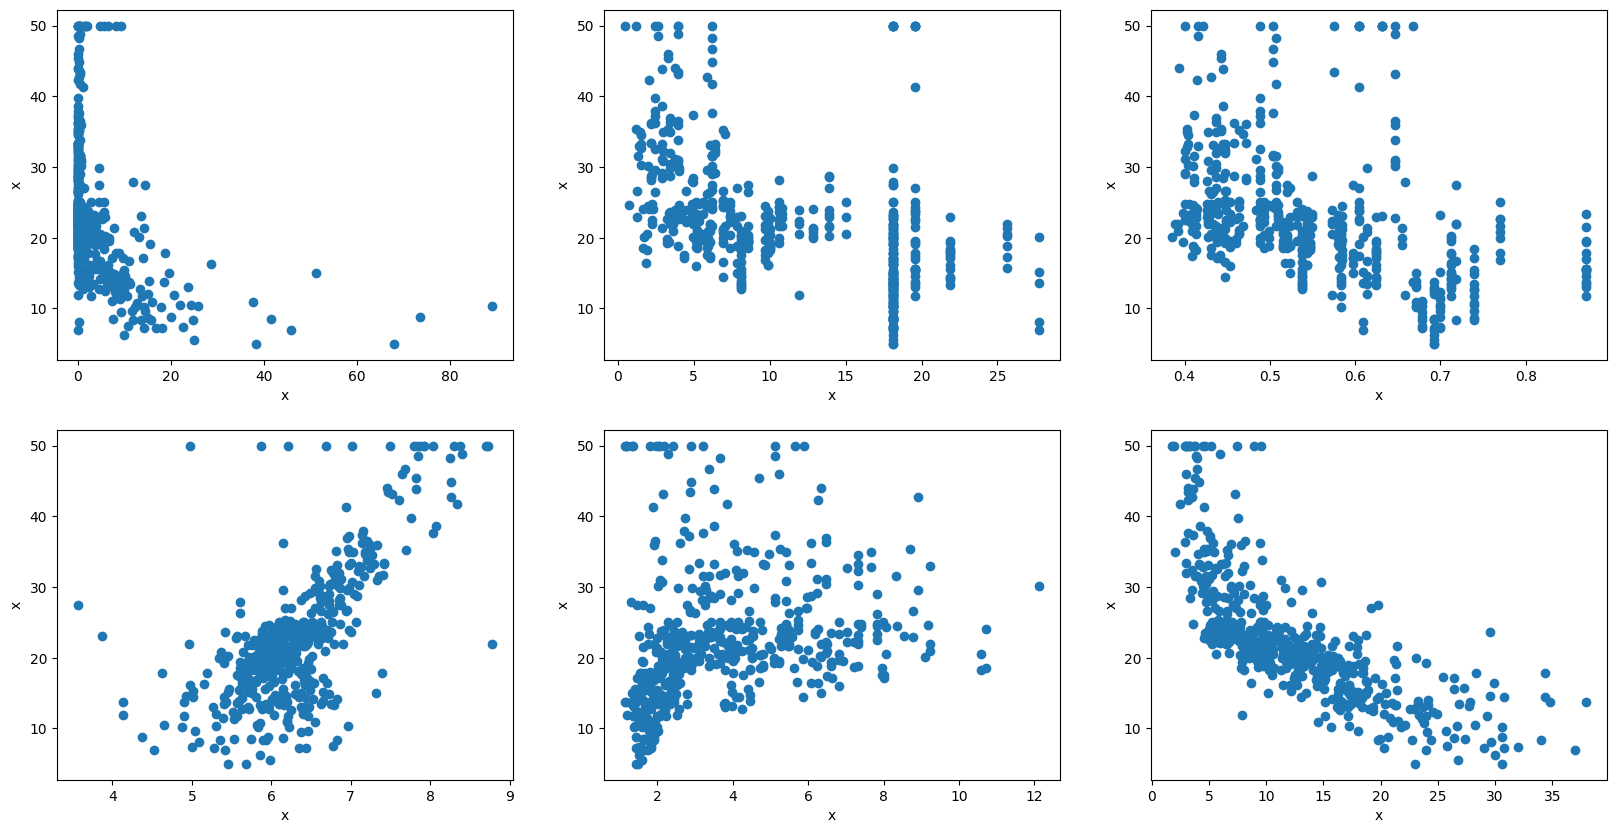

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].scatter(df.iloc[:, 0], df.iloc[:, 13], label = "cs")
ax[0][0].set_xlabel("x")
ax[0][0].set_ylabel("x")

ax[0][1].scatter(df.iloc[:, 2], df.iloc[:, 13])
ax[0][1].set_xlabel("x")
ax[0][1].set_ylabel("x")

ax[0][2].scatter(df.iloc[:, 4], df.iloc[:, 13])
ax[0][2].set_xlabel("x")
ax[0][2].set_ylabel("x")

ax[1][0].scatter(df.iloc[:, 5], df.iloc[:, 13])     #chose RM - average number of rooms per dwelling
ax[1][0].set_xlabel("x")
ax[1][0].set_ylabel("x")

ax[1][1].scatter(df.iloc[:, 7], df.iloc[:, 13])
ax[1][1].set_xlabel("x")
ax[1][1].set_ylabel("x")

ax[1][2].scatter(df.iloc[:, 12], df.iloc[:, 13])    #2nd choice
ax[1][2].set_xlabel("x")
ax[1][2].set_ylabel("x")

plt.show()

In [33]:
def lm(x, y) -> tuple[float, float]:
    # create random m, b
    m = np.random.randn(1)
    b = np.random.randn(1)
    print(m.shape)
    print(m+x)
    return m,b
lm(1,1)

(1,)
[1.3368816]


(array([0.3368816]), array([-0.899098]))

In [ ]:
y_pred = m*x+b